## Noice detector with output grayscale image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_noise(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    # Step 2: Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply a median filter
    filtered_image = cv2.medianBlur(gray_image, 5)

    # Step 4: Calculate noise level
    noise_mask = cv2.absdiff(gray_image, filtered_image)
    _, noise_mask = cv2.threshold(noise_mask, 30, 255, cv2.THRESH_BINARY)

    # Step 5: Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Filtered Image')
    plt.imshow(filtered_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Noise Detection')
    plt.imshow(noise_mask, cmap='gray')
    plt.axis('off')

    plt.show()

In [2]:
#detect_noise('growth/1.jpg')

## Noice detector with BGR image output

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_noise(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    # Step 2: Split the image into its color channels
    b, g, r = cv2.split(image)

    # Step 3: Apply a median filter to each channel
    filtered_b = cv2.medianBlur(b, 5)
    filtered_g = cv2.medianBlur(g, 5)
    filtered_r = cv2.medianBlur(r, 5)

    # Step 4: Merge the filtered channels back into a color image
    filtered_image = cv2.merge((filtered_b, filtered_g, filtered_r))

    # Step 5: Calculate noise level for each channel
    noise_mask_b = cv2.absdiff(b, filtered_b)
    noise_mask_g = cv2.absdiff(g, filtered_g)
    noise_mask_r = cv2.absdiff(r, filtered_r)

    # Combine the noise masks into a single mask
    noise_mask = cv2.max(noise_mask_b, cv2.max(noise_mask_g, noise_mask_r))
    _, noise_mask = cv2.threshold(noise_mask, 30, 255, cv2.THRESH_BINARY)

    # Step 6: Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Filtered Image')
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Noise Detection')
    plt.imshow(noise_mask, cmap='gray')
    plt.axis('off')

    plt.show()

In [4]:
#detect_noise('growth/1.jpg')

## Noice detector and remover with BGR image output

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_remove_noise(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    # Step 2: Split the image into its color channels
    b, g, r = cv2.split(image)

    # Step 3: Apply a median filter to each channel to remove noise
    filtered_b = cv2.medianBlur(b, 5)
    filtered_g = cv2.medianBlur(g, 5)
    filtered_r = cv2.medianBlur(r, 5)

    # Step 4: Merge the filtered channels back into a color image
    filtered_image = cv2.merge((filtered_b, filtered_g, filtered_r))

    # Step 5: Calculate noise level for each channel
    noise_mask_b = cv2.absdiff(b, filtered_b)
    noise_mask_g = cv2.absdiff(g, filtered_g)
    noise_mask_r = cv2.absdiff(r, filtered_r)

    # Combine the noise masks into a single mask
    noise_mask = cv2.max(noise_mask_b, cv2.max(noise_mask_g, noise_mask_r))
    _, noise_mask = cv2.threshold(noise_mask, 30, 255, cv2.THRESH_BINARY)

    # Step 6: Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Filtered Image (Noise Removed)')
    plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Noise Detection Mask')
    plt.imshow(noise_mask, cmap='gray')
    plt.axis('off')

    plt.show()

    # Optionally, save the filtered image
    cv2.imwrite('images/Leaf count/filtered/filtered_image.jpg', filtered_image)

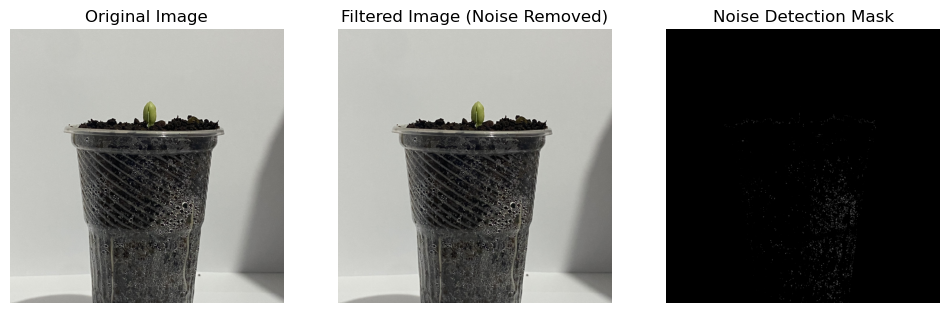

In [12]:
detect_and_remove_noise('images/Leaf count/IMG_6232.jpg')